In [1]:
!pip install coremltools

In [2]:
import coremltools as ct

In [3]:
#connecting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#changing directory to working directory
%cd /content/gdrive/MyDrive/Pearl Hacks

/content/gdrive/MyDrive/Pearl Hacks


In [5]:
PATH = './'

In [6]:
import pickle

In [7]:
filename = PATH+'prediction_l2.pkl'
with open(filename, "rb") as f:
    model = pickle.load(f)

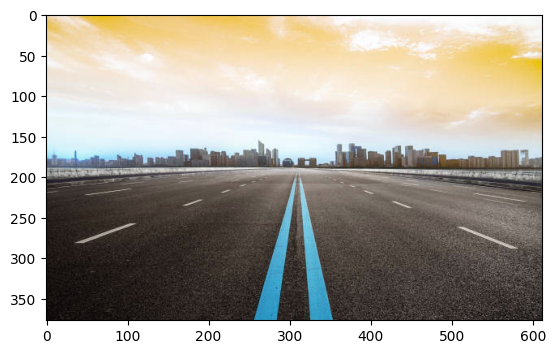

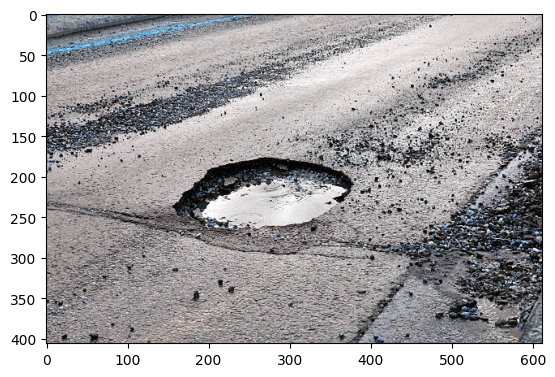

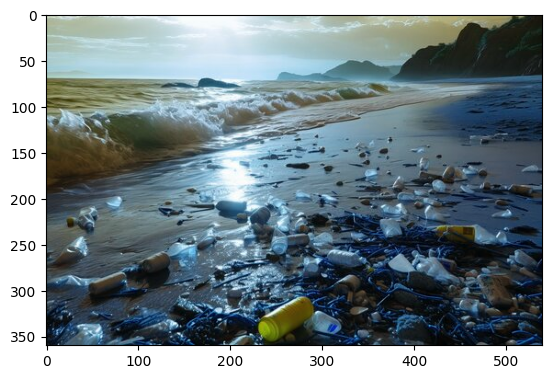

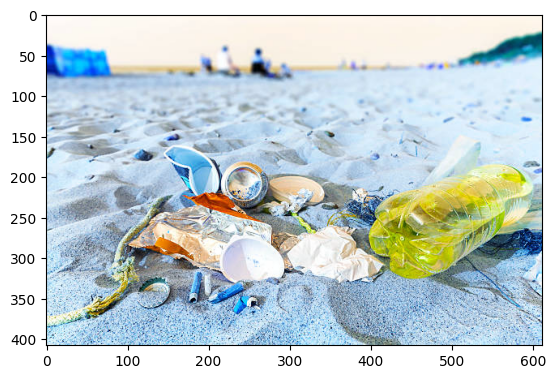

In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import os # operating system

def explore_dir(dir_path, count):
    for _, _, filenames in os.walk(dir_path):
        for i in range(count):
            img = cv2.imread(os.path.join(dir_path, filenames[i]))
            plt.imshow(img)
            plt.show()

predict_dir = 'predict'

explore_dir(predict_dir, 4)

In [117]:
desired_size = (150, 150)
X = []

def add_images(dir_path):
    for _, _, filenames in os.walk(dir_path):
        for file in filenames:
            try:
                img = cv2.imread(os.path.join(dir_path, file))
                img = cv2.resize(img, desired_size)
                X.append(np.array(img))
            except:
                print('Image ' + os.path.join(dir_path, file) + ' could not be resized')

add_images(predict_dir)

In [118]:
print(f"Dataset size: X = {len(X)}")

Dataset size: X = 4


In [11]:
# Let's convert this to CoreML
mlmodel = ct.convert(model, inputs=[ct.ImageType(shape=[1, 150, 150, 3])])

Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 66.35 passes/s]


In [9]:
mlmodel.save('PredictIssue.mlpackage')

In [119]:
X1 = np.array(X)
X1.shape

(4, 150, 150, 3)

In [120]:
result = model.predict(X1)
result

1/1 [==============================] - 0s 228ms/step


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [121]:
output = np.argmax(result, axis=1)
output

array([0, 1, 0, 0])

In [122]:
for i in range(0,len(output)):
  if output[i] == 0:
    print("Normal")
  elif output[i] == 1:
    print("Pothole")
  elif output[i] == 2:
    print("Flood")
  else:
    print("Litter")

Normal
Pothole
Normal
Normal
